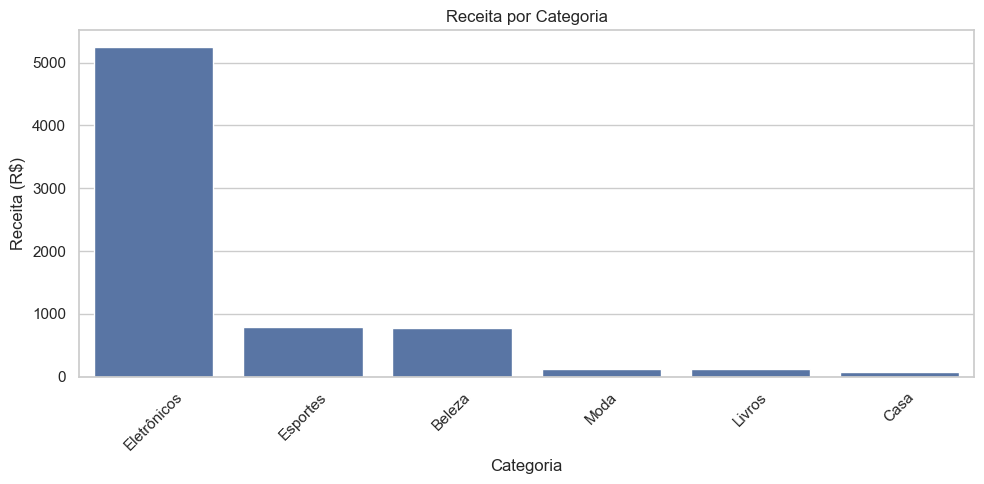

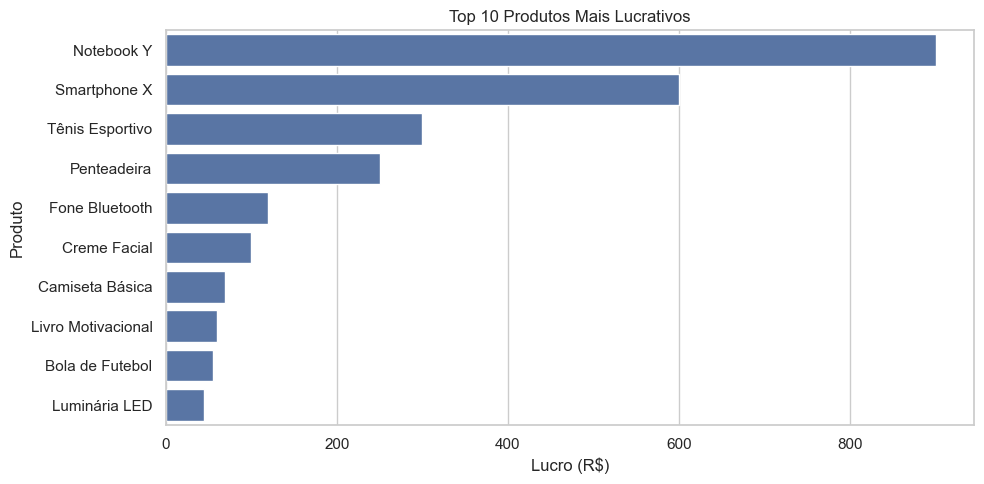

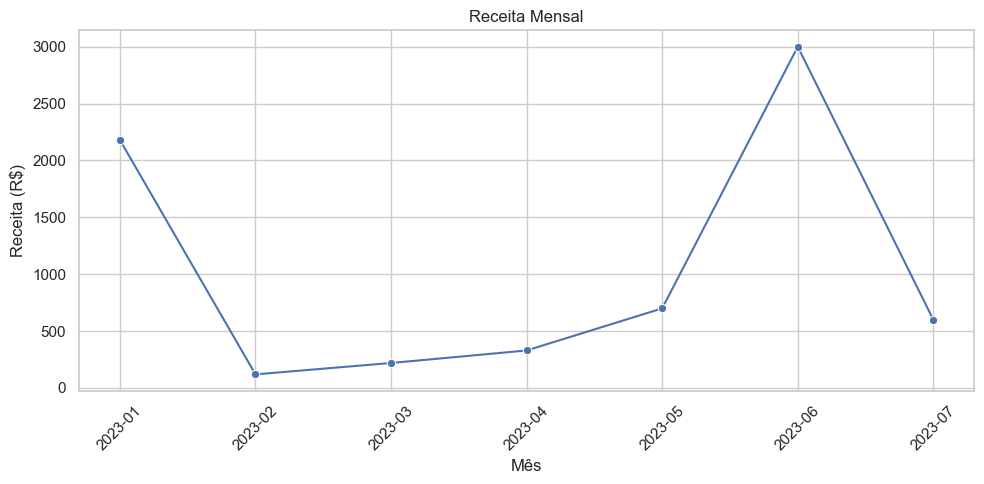

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set(style="whitegrid")

# Carregar arquivos
produtos = pd.read_csv('../dados/produtos.csv')
clientes = pd.read_csv('../dados/clientes.csv')
vendas = pd.read_csv('../dados/vendas.csv')

# Juntar produtos e vendas
df = vendas.merge(produtos, on='id_produto', how='left')
df['receita'] = df['quantidade'] * df['preco_venda']
df['custo_total'] = df['quantidade'] * df['custo']
df['lucro'] = df['receita'] - df['custo_total']
df['data_venda'] = pd.to_datetime(df['data_venda'])


categoria_agg = df.groupby('categoria')['receita'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=categoria_agg.index, y=categoria_agg.values)
plt.title('Receita por Categoria')
plt.ylabel('Receita (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


lucro_produto = df.groupby('nome')['lucro'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=lucro_produto.values, y=lucro_produto.index)
plt.title('Top 10 Produtos Mais Lucrativos')
plt.xlabel('Lucro (R$)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


df['mes'] = df['data_venda'].dt.to_period('M').astype(str)
vendas_mes = df.groupby('mes')['receita'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=vendas_mes.index, y=vendas_mes.values, marker='o')
plt.title('Receita Mensal')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../imagens/receita_categoria.png')  # Exemplo

